## _**Taxa de Sobrevivência no naufrágio do Titanic**_

Descrição do projeto: Projeto utilizando métodos de Ciência de Dados, Estatística e Machine Learning.

Dataset fornecido pela [Udacity](https://udacity.com) contendo informações reais sobre os passageiros do Titanic.

Dicionário:
- Survived (Sobreviveu): 0 = Não, 1 = Sim
- Pclass (Classe): Classe de ingresso 1 = 1º, 2 = 2º, 3 = 3º
- Sex (Sexo): Sexo do passageiro
- Age (Idade): Idade em anos
- Sibsp: Quantidade de irmãos / cônjuges a bordo do Titanic
- Parch: Quantidade de pais / crianças a bordo do Titanic
- Ticket (Bilhete): Número do bilhete de embarque
- Fare (Tarifa): Tarifa paga pelo Passageiro
- Cabin (Cabine): Número de cabine
- Embarked (Embarque): Porto de Embarque (C = Cherbourg, Q = Queenstown, S = Southampton)

## Importação de bibliotecas e tratamento de dados

### 1 - Importe as bibliotecas necessárias para o projeto

In [ ]:
import pandas as pd
import matplotlib as mpl 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


## Lendo a base de dados

In [ ]:
titanic = pd.read_csv('/content/titanic.data')
titanic.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2 - Quantas linhas e colunas tem o dataset? Quais os tipos das colunas?

In [ ]:
# linhas
total_linhas = titanic.shape[0]
total_linhas


891

In [ ]:
# colunas
total_colunas = len(titanic.columns)
total_colunas

12

In [ ]:
# tipo das colunas 
tipo_coluna = titanic.dtypes
tipo_coluna

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 3 - Renomeando para o português os nomes das colunas

In [ ]:
#renomear as colunas
titanic.columns = ['Nro. Passageiro', 'Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 'Irmãos/Cônjuges', 'Pais/Crianças', 'Nro. Bilhete', 'Preço do Bilhete', 'Cabine', 'Porto de Embarque']
titanic.head()


,Nro. Passageiro,Sobreviveu,Classe,Nome,Sexo,Idade,Irmãos/Cônjuges,Pais/Crianças,Nro. Bilhete,Preço do Bilhete,Cabine,Porto de Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Adequando o DataSet

### 4 - Procurando por colunas que contenham NaN values e em seguida atribua valores default para as colunas



In [ ]:
#achar colunas com Nan values
titanic.columns[titanic.isna().any()].tolist()

['Idade', 'Cabine', 'Porto de Embarque']

In [ ]:
#atribuindo valor default para colunas com Nan

titanic['Idade'] = titanic['Idade'].fillna(0)
titanic['Cabine'] = titanic['Cabine'].fillna(0)
titanic['Porto de Embarque'] = titanic['Porto de Embarque'].fillna("N")

#Onde "N" para a coluna Porto de Embarque seja "Nao informado"

titanic.head()


,Nro. Passageiro,Sobreviveu,Classe,Nome,Sexo,Idade,Irmãos/Cônjuges,Pais/Crianças,Nro. Bilhete,Preço do Bilhete,Cabine,Porto de Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


### 5 - Uma vez que algumas colunas não serão utilizadas, eventualmente é melhor excluí-las para que não interfiram na análise. Assim, exclua do dataset as colunas Irmãos/Cônjuges, Pais/Crianças e Número do Bilhete.

In [ ]:
#excluindo colunas
columns = ['Irmãos/Cônjuges', 'Pais/Crianças', 'Nro. Bilhete']
titanic = titanic.drop(columns, axis=1)

titanic.head()


,Nro. Passageiro,Sobreviveu,Classe,Nome,Sexo,Idade,Preço do Bilhete,Cabine,Porto de Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,S


### 6 - Alterar o conteudo da coluna Sexo para:
- female => Mulher
- male   => Homem

In [ ]:
#alterando o conteudo da coluna Sexo

titanic['Sexo'] = titanic['Sexo'].replace(['male', 'female'], ['homem', 'mulher'])

titanic.head()



,Nro. Passageiro,Sobreviveu,Classe,Nome,Sexo,Idade,Preço do Bilhete,Cabine,Porto de Embarque
0,1,0,3,"Braund, Mr. Owen Harris",homem,22.0,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",mulher,26.0,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",mulher,35.0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",homem,35.0,8.0500,0,S


## Algumas estatísticas

### 7 - Idade média dos passageiros(homens, mulheres, crianças)

In [ ]:
#calculando a idade media dos passageiros
idade_media = titanic['Idade'].mean()


print("A idade media dos passageiros é : %.2f" % idade_media)

A idade media dos passageiros é : 23.80


### 8 - Idade média dos passageiros que sobreviveram

In [ ]:
#calculando a idade media dos sobreviventes

idade_sobr = titanic['Idade'][ titanic['Sobreviveu'] == 1 ].mean()

print("A idade media dos sobreviventes é : %.2f" % idade_sobr)

A idade media dos sobreviventes é : 24.03


### 9 - Idade média dos passageiros não sobreviveram?

In [ ]:
#calculando a idade media dos não sobreviventes

idade_sobr = titanic['Idade'][ titanic['Sobreviveu'] == 0 ].mean()

print("A idade media dos não sobreviventes é : %.2f" % idade_sobr + " anos")

A idade media dos não sobreviventes é : 23.65 anos


### 10 - Qual o passageiro mais jovem e o mais velho a bordo?

In [ ]:
#ache a idade do passageiro mais jovem e mais velho

idade_min = titanic['Idade'].min()
idade_max = titanic['Idade'].max()



print("O passageiro mais jovem tem : %.2f" % idade_min +  " anos.")
print("O passgeiro mais velho tem : %.2f" % idade_max + " anos.")

O passageiro mais jovem tem : 0.00 anos.
O passgeiro mais velho tem : 80.00 anos.


### 11 - Mostre a distribuição dos passageiros de acordo com a classe

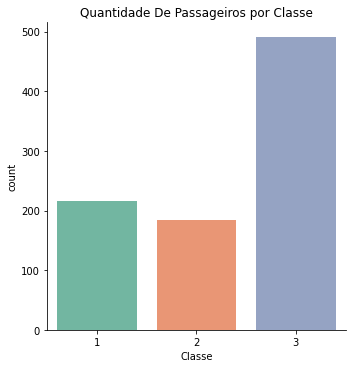

In [ ]:
# Distribuição dos passageiros por classe.


distr = sns.catplot(x="Classe", kind="count", palette="Set2", data=titanic)
distr.set(title='Quantidade De Passageiros por Classe')
plt.show()


### 12 - Mostre a distribuição de passageiros por porto de embarque

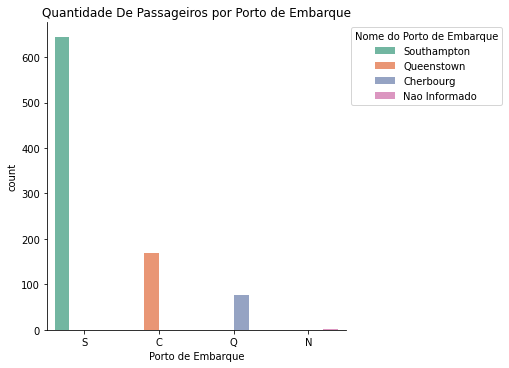

In [ ]:
# Distribuição dos passageiros por porto de embarque.


porto_emb = sns.catplot(x="Porto de Embarque", kind="count", palette="Set2", hue="Porto de Embarque", data=titanic)
porto_emb.set(title='Quantidade De Passageiros por Porto de Embarque')
plt.legend(labels=["Southampton","Queenstown","Cherbourg","Nao Informado"], title = "Nome do Porto de Embarque", loc = 2, bbox_to_anchor = (1,1))
plt.show()

### 13 - Mostre o numero de passageiros que sobreviveram e não sobreviveram por classe

In [ ]:
#ache a quantidade de passageiros 0 e 1
titanic.groupby(['Classe','Sobreviveu']).agg({'Nro. Passageiro': np.size})


Nro. Passageiro
Classe Sobreviveu                 
1      0                        80
       1                       136
2      0                        97
       1                        87
3      0                       372
       1                       119

### 14 - Qual a quantidade de sobreviventes e não sobreviventes por porto de embarque?

In [ ]:
#quantidade de sobreviventes por porto

titanic.groupby(['Porto de Embarque','Sobreviveu']).agg({'Nro. Passageiro': np.size})



Nro. Passageiro
Porto de Embarque Sobreviveu                 
C                 0                        75
                  1                        93
N                 1                         2
Q                 0                        47
                  1                        30
S                 0                       427
                  1                       217

### 15 - Crie um novo dataframe chamado "Botes" com as colunas "Tipo de Bote", "Quantidade de Botes" e "Lugares Disponiveis" 

Dicionário:
- Tipo de Bote : 1, 2 e 3
- Quantidade de Botes: Quantidade de botes por tipo
- Lugares Disponíveis: Quantidade de lugares em cada bote

In [ ]:
#Criando um dicionario de dados
obj_bote = {'Tipo': [1, 2, 3], 'Quantidade': [14, 2, 4], 'Lugares': [65, 40, 47]}

#Criando o dataframe
bote = pd.DataFrame(data=obj_bote)
bote

,Tipo,Quantidade,Lugares
0,1,14,65
1,2,2,40
2,3,4,47


### 16 - Qual a taxa de ocupacão dos botes de acordo com o número de sobreviventes?

In [ ]:
#achar a quantidade total de lugares
total_lugares = bote['Quantidade'] * bote['Lugares']
total_final_lugares = total_lugares.sum()
print("Lugares disponiveis:", total_final_lugares)

#calcule a taxa de ocupacao

total_sobreviventes = titanic['Sobreviveu'].sum()
print("Numero de sobreviventes: ", total_sobreviventes)

taxa_ocupacao = (total_sobreviventes / total_final_lugares) * 100

print("A taxa de ocupacao nos botes é : %.2f" % taxa_ocupacao + "%")

Lugares disponiveis: 1178
Numero de sobreviventes:  342
A taxa de ocupacao nos botes é : 29.03%


### 17 - Calcule a taxa de mortalidade a cada 100 passageiros

In [ ]:
#total de passageiros
total_passageiros = titanic['Nro. Passageiro'].count()
print("Numero total de passageiros: ", total_passageiros)

#total de mortos
total_mortos = total_passageiros - total_sobreviventes
print("O numero de mortos é : ", total_mortos)

taxa_mortalidade = (total_mortos / total_passageiros) * 100

print("A taxa de mortalidade no naufragio foi de : %.2f" % taxa_mortalidade + "%")


Numero total de passageiros:  891
O numero de mortos é :  549
A taxa de mortalidade no naufragio foi de : 61.62%


### 18 - Calcule a quantidade de lugares disponíveis a cada 100 passageiros

In [ ]:
#calcular a disponibilidade de lugares nos botes para todos os passageiros

qtde_lugar_disp = (total_final_lugares / total_passageiros) * 100

print("A quantidade de lugares a cada 100 pessoas é  : %.2f" % qtde_lugar_disp)

A quantidade de lugares a cada 100 pessoas é  : 132.21


### 19 -  Distribuição de lugares por tipo de bote. Mostre em um gráfico.

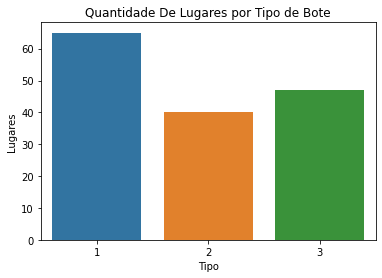

In [ ]:
#Mostre a distruibuicao de lugares por tipo de bote

#qtde_bote  = sns.catplot(x="Tipo", kind="count", palette="Set2", data=bote)
#qtde_bote.set(title='Quantidade De Lugares por Tipo de Bote')


#botes = sns.load_dataset('bote')
botes = sns.barplot(x='Tipo', y='Lugares', data=bote)
botes.set(title='Quantidade De Lugares por Tipo de Bote')
plt.show()



## Conclusões 

- Baseado nas analises mostradas acima, podemos concluir que a classe social e o sexo foram fatores que aumentaram ou diminuiu a taxa de sobrevivencia entre os passageiros.

- Outro ponto mostrado, é a disponibilidade de lugares nos botes salva-vidas. Apesar de termos apenas dados disponiveis de 891 passageiros e haver 1178 lugares nos botes, nao foi possivel salvar todos. Segundo relatos da epoca do naufragio, varios botes salva vidas nao tiveram sua capacidade total preenchida com passageiros, causando entao a mortandade de varios passageiros.


